Build a Simple Workflow or Graph Using LangGraph

**State**

First, define the **State** of the graph.

The **State** schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

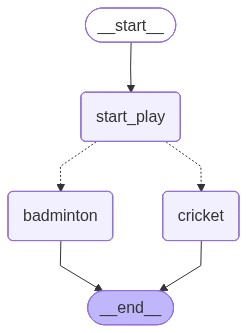

In [ ]:
# 🟩 Step 1: Define the State
# 🧾 We define a class State to store the graph data.
# 🛠️ This class uses TypedDict so we can represent data as dictionary (key-value format).

from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str
# 🔸 ✅ Now graph_info can store text like "I'm planning to play..." and this info can be updated by each node.

# 🟩 Step 2: Define the Nodes

# 🧠 Each node is a function that:
# Takes state as the first parameter
# Returns updated graph_info
# ✅ This function adds: " I am planning to play." to whatever was already there in graph_info.
# state is used to pass data between nodes.
# State is a dictionary that holds the current state of the graph.
def start_play(state: State): 
    print("start_play node has been called")
    return {
        "graph_info": state["graph_info"] + " I am planning to play."
    }

# 🔸 ➤ Node 2: cricket()
def cricket(state: State):
    print("cricket node has been called")
    return {
        "graph_info": state["graph_info"] + " I decided to play cricket."
    }

# 🔸 ➤ Node 3: badminton()
def badminton(state: State):
    print("badminton node has been called")
    return {
        "graph_info": state["graph_info"] + " I decided to play badminton."
    }

# 🟩 Step 3: Add Random Decision Logic
# 🎲 We create a function to randomly decide whether to go to cricket or badminton node.
# ✅ This function randomly returns either "cricket" or "badminton" based on a random number.
import random
from typing import Literal

def random_play(state: State) -> Literal["cricket", "badminton"]:
    graph_info = state["graph_info"]
    
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

# 🟩 Step 4: Build the Graph

# 📦 Image and display ➝ to show the graph diagram.
# 📦 StateGraph ➝ main class to create the workflow/graph.
# 📦 start and end ➝ represent the start and end points of the graph.
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END

# 🧱 Step 4.1: Create the graph
graph = StateGraph(State)
# 🔑 State ➝ This is your state schema (input/output info shared across nodes).
# 🏗️ This line sets up the structure where you’ll add your nodes and flow.

# 🛠️ Step 4.2: Add nodes to the graph
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)
# Each add_node():
# 🏷️ First argument = name of the node (you can give any name).
# 🧠 Second argument = the function it should run.
# 💡 Here, the node name and function name are kept the same to avoid confusion.

# 🔗 Step 4.3: Add edges to the graph
graph.add_edge(START, "start_play")
# 🔹 start ➝ is the start node.
graph.add_conditional_edges("start_play", random_play)
# 💡 random_play returns either "cricket" or "badminton" as a string.
# ⚙️ The framework will automatically call either:
# cricket node OR
# badminton node based on the value returned.
# 🔄 These are called conditional edges (decisions made dynamically).

# 🔹 3.3: Connect Final Nodes to end
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)
# 🧪 Step 4: Compile the Graph
graph_builder = graph.compile()

# 🖼️ Step 5: Visualize the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [ ]:
# 🚀 Step 6: Invoke the Graph (Run the Workflow)
graph_builder.invoke({"graph_info": "Hi, my name is Apoorv. "})
# {'graph_info': 'Hi, my name is Apoorv.  I am planning to play. I decided to play cricket.'}

# ⚙️ The graph will:
# Start at start_play, add "I am planning to play"
# Call random_play() and decide between cricket/badminton
# Append the selected game and finish the execution
# 🖨️ You’ll also see debug prints like:
# Start play node has been called
# Cricket node has been called or Badminton node has been called

start_play node has been called
cricket node has been called


{'graph_info': 'Hi, my name is Apoorv.  I am planning to play. I decided to play cricket.'}